In [42]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
import numpy as np
import datetime
%matplotlib inline

        
def live_plot(scores, start_time, figsize=None, title=''):
    clear_output(wait=True)
    BIGGER_SIZE = 30

    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title
    
    width = 1.0 / len(scores) # the width of the bars
    
    fig, ax = plt.subplots(figsize=(18,18))
    position = 0
    for i in range(len(scores)):
        color = (float(65/255), float(179/255), float(247/255), 1)
        if i % 2 == 0:
            color = (float(129/255), float(203/255), float(248/255), 1)
        rects = ax.bar(position, scores[i], width, color=color, edgecolor='white')
        
        if i == (len(scores) - 1):
            rect = rects[len(rects) - 1]
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height, round(scores[i], 3), ha='center', va='bottom')
        
        position += width
           
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Performance')
    ax.set_xlabel('Epochs ->')
    ax.set_title('JIDO Search - Pipeline score evolution')
    ax.set_xticklabels([])
    
    # Add a floating elapsed time
    elapsed = datetime.datetime.utcnow() - start_time
    time_display = str(elapsed).split('.', 2)[0]
    ax.text(0 - (width / 2), 0.9, "Elapsed: %s\n%s" % (time_display, time_display))

    plt.ylim([0,1.0])
    plt.show()    

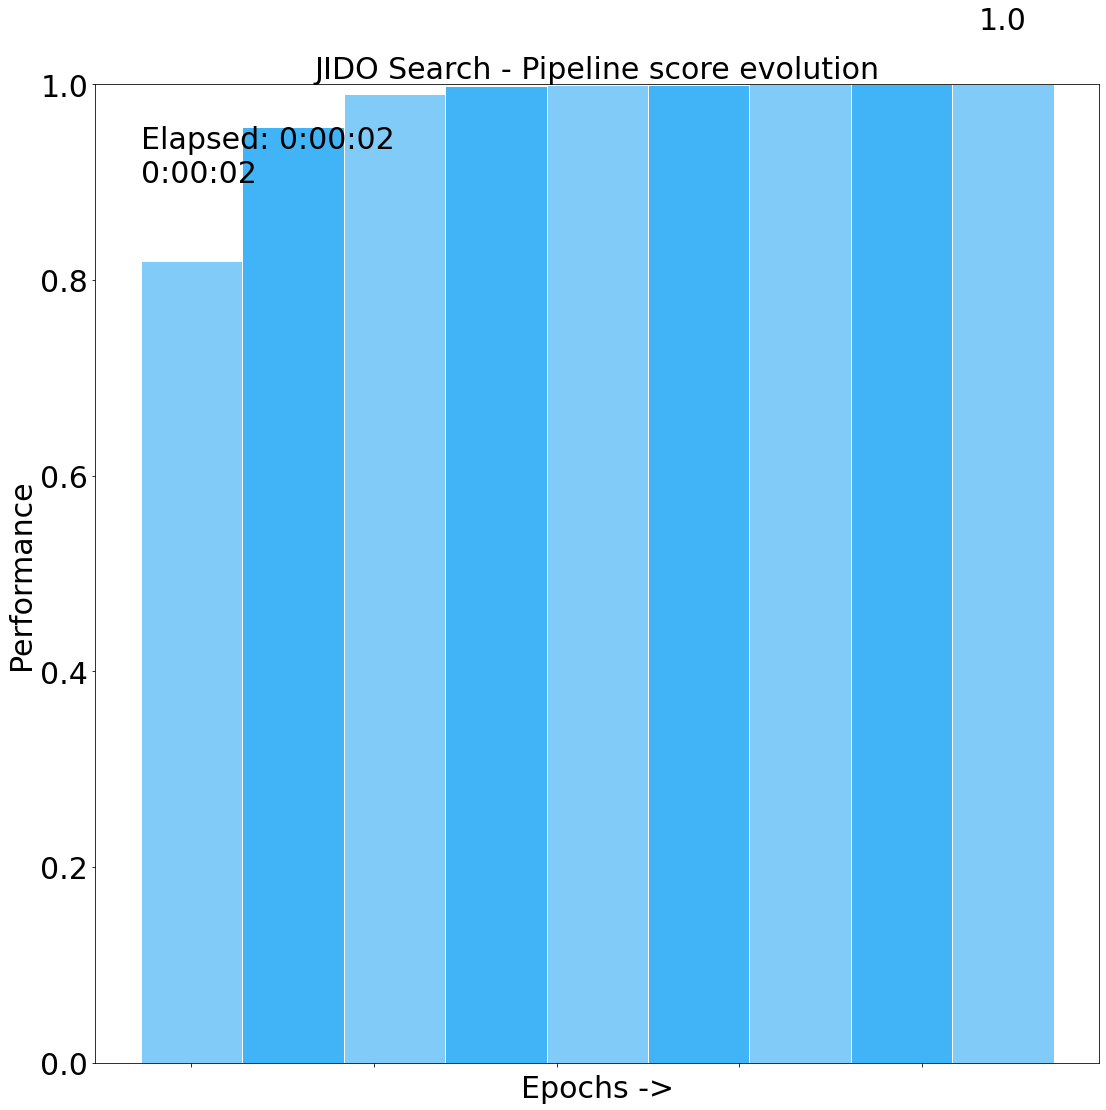

In [43]:
import numpy as np
import datetime
scores = list()
highest = 0
start_time = datetime.datetime.utcnow()
for i in range(100000):
    val = np.random.random()
    if val > highest:
        highest = val
        scores.append(val)
        live_plot(scores, start_time)